# PREPARACIÓN DATOS

### Importamos librerías

In [82]:
import pandas as pd
import numpy as np
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from spotipy.oauth2 import SpotifyClientCredentials # para el acceso

# guardo en variable para facilitar acceso y uso
clientID = '11f8b154e9c348d5935db01347721ac6'
clientSecret = '267327da62db45c99cb94de679956e11'

# Authentication
client_credential_manager = SpotifyClientCredentials(client_id=clientID, client_secret=clientSecret)
sp = spotipy.Spotify(client_credentials_manager=client_credential_manager)

In [43]:
df_songs = pd.read_csv("/Users/gabrielarodrigocastrillo/Desktop/The_Bridge/Data_Science/COPIA_Repositorio/03-Machine_Learning/Proyecto_ML/SRC/data/data_unique.csv")
df_songs

,index,added_at,album_type,album_avb_mkt,album_image,album_name,album_release_date,album_total_tracks,artist_id,artist,...,valence,loudness,tempo,tempo_confidence,time_signature,time_signature_confidence,key,key_confidence,mode,mode_confidence
0,0,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273a935e4...,Unholy (feat. Kim Petras),2022-09-22,1,2wY79sveU1sp5g7SokKOiI,Sam Smith,...,0.238,-7.384,131.007,0.358,4,1.000,2,0.485,1,0.416
1,1,2022-11-25T11:45:12Z,album,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273bb54dd...,Midnights,2022-10-21,13,06HL4z0CvFAxyc27GXpf02,Taylor Swift,...,0.533,-6.645,96.888,0.102,4,1.000,4,0.073,1,0.267
2,2,2022-11-25T11:45:12Z,album,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27302854a...,Her Loss,2022-11-04,16,3TVXtAsR1Inumwj472S9r4,Drake,...,0.424,-9.390,160.070,0.204,4,0.954,4,0.000,0,0.041
3,3,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273c9f744...,La Bachata,2022-05-26,1,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,...,0.850,-5.329,124.980,0.877,4,1.000,7,0.588,0,0.485
4,4,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273933c03...,I'm Good (Blue),2022-08-26,2,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,...,0.304,-3.673,128.040,0.808,4,0.789,7,0.898,0,0.773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,43,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273584941...,Thức Giấc,2021-07-14,1,6zUWZmyi5MLOEynQ5wCI5f,Da LAB,...,0.190,-8.591,127.092,0.713,4,1.000,9,0.286,1,0.427
1463,44,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2732a8efe...,Đi Về Nhà,2020-12-20,1,1LEtM3AleYg1xabW6CRkpi,Đen,...,0.486,-4.651,84.006,0.004,4,1.000,5,0.315,1,0.364
1464,45,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273d39b6f...,Mặt Mộc,2022-08-05,1,2Xlia1jlI7JDki4Xa42uyK,Phạm Nguyên Ngọc,...,0.697,-4.894,167.979,0.284,4,0.950,4,0.400,1,0.455
1465,46,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27396dc8a...,Anh Đánh Rơi Người Yêu Này,2019-07-15,1,0tBmmwc8j8zbJxISwdsvjA,Andiez,...,0.304,-6.093,170.205,0.103,4,0.748,4,0.470,1,0.502


### AÑADO GÉNEROS Y FOLLOWERS

In [44]:
artist_genres = []
artist_followers = []

for a_id in df_songs.artist_id:
    artist = sp.artist(a_id)
    artist_genres.append(artist['genres'])
    artist_followers.append(artist['followers']['total'])

df_songs_new = df_songs.assign(artist_genres=artist_genres, artist_followers=artist_followers)
df_songs_new

,index,added_at,album_type,album_avb_mkt,album_image,album_name,album_release_date,album_total_tracks,artist_id,artist,...,tempo,tempo_confidence,time_signature,time_signature_confidence,key,key_confidence,mode,mode_confidence,artist_genres,artist_followers
0,0,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273a935e4...,Unholy (feat. Kim Petras),2022-09-22,1,2wY79sveU1sp5g7SokKOiI,Sam Smith,...,131.007,0.358,4,1.000,2,0.485,1,0.416,"[pop, uk pop]",21941592
1,1,2022-11-25T11:45:12Z,album,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273bb54dd...,Midnights,2022-10-21,13,06HL4z0CvFAxyc27GXpf02,Taylor Swift,...,96.888,0.102,4,1.000,4,0.073,1,0.267,[pop],68790239
2,2,2022-11-25T11:45:12Z,album,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27302854a...,Her Loss,2022-11-04,16,3TVXtAsR1Inumwj472S9r4,Drake,...,160.070,0.204,4,0.954,4,0.000,0,0.041,"[canadian hip hop, canadian pop, hip hop, rap,...",72422541
3,3,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273c9f744...,La Bachata,2022-05-26,1,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,...,124.980,0.877,4,1.000,7,0.588,0,0.485,"[colombian pop, latin pop, reggaeton, reggaeto...",11590306
4,4,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273933c03...,I'm Good (Blue),2022-08-26,2,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,...,128.040,0.808,4,0.789,7,0.898,0,0.773,"[big room, dance pop, edm, pop, pop dance]",25597652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,43,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273584941...,Thức Giấc,2021-07-14,1,6zUWZmyi5MLOEynQ5wCI5f,Da LAB,...,127.092,0.713,4,1.000,9,0.286,1,0.427,"[indie viet, v-pop, vietnamese hip hop]",839850
1463,44,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2732a8efe...,Đi Về Nhà,2020-12-20,1,1LEtM3AleYg1xabW6CRkpi,Đen,...,84.006,0.004,4,1.000,5,0.315,1,0.364,"[indie viet, v-pop, vietnamese hip hop, vietna...",3013237
1464,45,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273d39b6f...,Mặt Mộc,2022-08-05,1,2Xlia1jlI7JDki4Xa42uyK,Phạm Nguyên Ngọc,...,167.979,0.284,4,0.950,4,0.400,1,0.455,"[v-pop, vietnamese singer-songwriter]",49306
1465,46,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27396dc8a...,Anh Đánh Rơi Người Yêu Này,2019-07-15,1,0tBmmwc8j8zbJxISwdsvjA,Andiez,...,170.205,0.103,4,0.748,4,0.470,1,0.502,"[v-pop, vietnamese singer-songwriter]",273974


In [45]:
df_songs_new.drop(columns=["index"],axis=1, inplace=True)
df_songs_new

,added_at,album_type,album_avb_mkt,album_image,album_name,album_release_date,album_total_tracks,artist_id,artist,available_mkt,...,tempo,tempo_confidence,time_signature,time_signature_confidence,key,key_confidence,mode,mode_confidence,artist_genres,artist_followers
0,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273a935e4...,Unholy (feat. Kim Petras),2022-09-22,1,2wY79sveU1sp5g7SokKOiI,Sam Smith,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,131.007,0.358,4,1.000,2,0.485,1,0.416,"[pop, uk pop]",21941592
1,2022-11-25T11:45:12Z,album,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273bb54dd...,Midnights,2022-10-21,13,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,96.888,0.102,4,1.000,4,0.073,1,0.267,[pop],68790239
2,2022-11-25T11:45:12Z,album,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27302854a...,Her Loss,2022-11-04,16,3TVXtAsR1Inumwj472S9r4,Drake,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,160.070,0.204,4,0.954,4,0.000,0,0.041,"[canadian hip hop, canadian pop, hip hop, rap,...",72422541
3,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273c9f744...,La Bachata,2022-05-26,1,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,124.980,0.877,4,1.000,7,0.588,0,0.485,"[colombian pop, latin pop, reggaeton, reggaeto...",11590306
4,2022-11-25T11:45:12Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273933c03...,I'm Good (Blue),2022-08-26,2,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,128.040,0.808,4,0.789,7,0.898,0,0.773,"[big room, dance pop, edm, pop, pop dance]",25597652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273584941...,Thức Giấc,2021-07-14,1,6zUWZmyi5MLOEynQ5wCI5f,Da LAB,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,127.092,0.713,4,1.000,9,0.286,1,0.427,"[indie viet, v-pop, vietnamese hip hop]",839850
1463,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2732a8efe...,Đi Về Nhà,2020-12-20,1,1LEtM3AleYg1xabW6CRkpi,Đen,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,84.006,0.004,4,1.000,5,0.315,1,0.364,"[indie viet, v-pop, vietnamese hip hop, vietna...",3013237
1464,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273d39b6f...,Mặt Mộc,2022-08-05,1,2Xlia1jlI7JDki4Xa42uyK,Phạm Nguyên Ngọc,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,167.979,0.284,4,0.950,4,0.400,1,0.455,"[v-pop, vietnamese singer-songwriter]",49306
1465,2022-11-25T11:45:20Z,single,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27396dc8a...,Anh Đánh Rơi Người Yêu Này,2019-07-15,1,0tBmmwc8j8zbJxISwdsvjA,Andiez,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",...,170.205,0.103,4,0.748,4,0.470,1,0.502,"[v-pop, vietnamese singer-songwriter]",273974


In [46]:
df_songs_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   added_at                   1467 non-null   object 
 1   album_type                 1467 non-null   object 
 2   album_avb_mkt              1467 non-null   object 
 3   album_image                1467 non-null   object 
 4   album_name                 1467 non-null   object 
 5   album_release_date         1467 non-null   object 
 6   album_total_tracks         1467 non-null   int64  
 7   artist_id                  1467 non-null   object 
 8   artist                     1467 non-null   object 
 9   available_mkt              1467 non-null   object 
 10  track_duration             1467 non-null   float64
 11  explicit                   1467 non-null   bool   
 12  track_id                   1467 non-null   object 
 13  track_name                 1467 non-null   objec

In [9]:
#Guardo tabla con datos raw
df_songs_new.to_csv("raw_data.csv", index=False)

### Transformación y limpieza

In [48]:
df_songs_new.columns

Index(['added_at', 'album_type', 'album_avb_mkt', 'album_image', 'album_name',
       'album_release_date', 'album_total_tracks', 'artist_id', 'artist',
       'available_mkt', 'track_duration', 'explicit', 'track_id', 'track_name',
       'popularity', 'playlist_link', 'country', 'danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'loudness', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'key', 'key_confidence', 'mode',
       'mode_confidence', 'artist_genres', 'artist_followers'],
      dtype='object')

In [49]:
df_songs.album_type.value_counts()

single         831
album          628
compilation      8
Name: album_type, dtype: int64

In [50]:
# Tratamos col album_type
df_songs_new = pd.get_dummies(df_songs_new, columns = ["album_type"], prefix = ["al_type"])

En la primera prueba eliminé el al_type_compilation, pero por correlación mejor eliminar single o album

In [51]:
df_songs_new.drop(columns=("al_type_album"),axis=1, inplace=True)

In [15]:
df_songs_new

,added_at,album_avb_mkt,album_image,album_name,album_release_date,album_total_tracks,artist_id,artist,available_mkt,track_duration,...,time_signature,time_signature_confidence,key,key_confidence,mode,mode_confidence,artist_genres,artist_followers,al_type_compilation,al_type_single
0,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273a935e4...,Unholy (feat. Kim Petras),2022-09-22,1,2wY79sveU1sp5g7SokKOiI,Sam Smith,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",156.943,...,4,1.000,2,0.485,1,0.416,"[pop, uk pop]",21931185,0,1
1,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273bb54dd...,Midnights,2022-10-21,13,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",200.690,...,4,1.000,4,0.073,1,0.267,[pop],68732645,0,0
2,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27302854a...,Her Loss,2022-11-04,16,3TVXtAsR1Inumwj472S9r4,Drake,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",239.359,...,4,0.954,4,0.000,0,0.041,"[canadian hip hop, canadian pop, hip hop, rap,...",72390794,0,0
3,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273c9f744...,La Bachata,2022-05-26,1,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",162.637,...,4,1.000,7,0.588,0,0.485,"[colombian pop, latin pop, reggaeton, reggaeto...",11583371,0,1
4,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273933c03...,I'm Good (Blue),2022-08-26,2,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",175.238,...,4,0.789,7,0.898,0,0.773,"[big room, dance pop, edm, pop, pop dance]",25592264,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273584941...,Thức Giấc,2021-07-14,1,6zUWZmyi5MLOEynQ5wCI5f,Da LAB,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",269.021,...,4,1.000,9,0.286,1,0.427,"[indie viet, v-pop, vietnamese hip hop]",839402,0,1
1463,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2732a8efe...,Đi Về Nhà,2020-12-20,1,1LEtM3AleYg1xabW6CRkpi,Đen,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",200.000,...,4,1.000,5,0.315,1,0.364,"[indie viet, v-pop, vietnamese hip hop, vietna...",3010763,0,1
1464,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273d39b6f...,Mặt Mộc,2022-08-05,1,2Xlia1jlI7JDki4Xa42uyK,Phạm Nguyên Ngọc,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",214.293,...,4,0.950,4,0.400,1,0.455,"[v-pop, vietnamese singer-songwriter]",49133,0,1
1465,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27396dc8a...,Anh Đánh Rơi Người Yêu Này,2019-07-15,1,0tBmmwc8j8zbJxISwdsvjA,Andiez,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",217.729,...,4,0.748,4,0.470,1,0.502,"[v-pop, vietnamese singer-songwriter]",273651,0,1


In [18]:
df_songs.explicit.value_counts()

False    1034
True      433
Name: explicit, dtype: int64

In [55]:
# Tratamos col explicit
df_songs_new = pd.get_dummies(df_songs_new, columns = ["explicit"], prefix = ["exp"])
df_songs_new.drop(columns=("exp_True"),axis=1, inplace=True) # eliminamos por correlación

In [56]:
df_songs_new

,added_at,album_avb_mkt,album_image,album_name,album_release_date,album_total_tracks,artist_id,artist,available_mkt,track_duration,...,time_signature_confidence,key,key_confidence,mode,mode_confidence,artist_genres,artist_followers,al_type_compilation,al_type_single,exp_False
0,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273a935e4...,Unholy (feat. Kim Petras),2022-09-22,1,2wY79sveU1sp5g7SokKOiI,Sam Smith,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",156.943,...,1.000,2,0.485,1,0.416,"[pop, uk pop]",21941592,0,1,1
1,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273bb54dd...,Midnights,2022-10-21,13,06HL4z0CvFAxyc27GXpf02,Taylor Swift,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",200.690,...,1.000,4,0.073,1,0.267,[pop],68790239,0,0,1
2,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27302854a...,Her Loss,2022-11-04,16,3TVXtAsR1Inumwj472S9r4,Drake,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",239.359,...,0.954,4,0.000,0,0.041,"[canadian hip hop, canadian pop, hip hop, rap,...",72422541,0,0,0
3,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273c9f744...,La Bachata,2022-05-26,1,0tmwSHipWxN12fsoLcFU3B,Manuel Turizo,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",162.637,...,1.000,7,0.588,0,0.485,"[colombian pop, latin pop, reggaeton, reggaeto...",11590306,0,1,1
4,2022-11-25T11:45:12Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273933c03...,I'm Good (Blue),2022-08-26,2,1Cs0zKBU1kc0i8ypK3B9ai,David Guetta,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",175.238,...,0.789,7,0.898,0,0.773,"[big room, dance pop, edm, pop, pop dance]",25597652,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273584941...,Thức Giấc,2021-07-14,1,6zUWZmyi5MLOEynQ5wCI5f,Da LAB,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",269.021,...,1.000,9,0.286,1,0.427,"[indie viet, v-pop, vietnamese hip hop]",839850,0,1,1
1463,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2732a8efe...,Đi Về Nhà,2020-12-20,1,1LEtM3AleYg1xabW6CRkpi,Đen,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",200.000,...,1.000,5,0.315,1,0.364,"[indie viet, v-pop, vietnamese hip hop, vietna...",3013237,0,1,1
1464,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273d39b6f...,Mặt Mộc,2022-08-05,1,2Xlia1jlI7JDki4Xa42uyK,Phạm Nguyên Ngọc,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",214.293,...,0.950,4,0.400,1,0.455,"[v-pop, vietnamese singer-songwriter]",49306,0,1,1
1465,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b27396dc8a...,Anh Đánh Rơi Người Yêu Này,2019-07-15,1,0tBmmwc8j8zbJxISwdsvjA,Andiez,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",217.729,...,0.748,4,0.470,1,0.502,"[v-pop, vietnamese singer-songwriter]",273974,0,1,1


In [28]:
# Tratamos col 'track_name' - hacer NLP
## me sugiere Jaime que lo deje para el final, mucho trabajo para lo que me puede aportar (¿?)-Alex?
print(len(df_songs_new.track_name.unique())) #por qué no son 1467?

1457


In [29]:
df_songs_new.track_name = df_songs_new["track_name"].str.strip()

In [40]:
df_songs_new.loc[df_songs_new["track_name"]=="Habibi"] #mismo nombre de canción, diferente artista

,added_at,album_avb_mkt,album_image,album_name,album_release_date,album_total_tracks,artist_id,artist,available_mkt,track_duration,...,time_signature_confidence,key,key_confidence,mode,mode_confidence,artist_genres,artist_followers,al_type_compilation,al_type_single,exp_False
774,2022-11-25T11:45:20Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2733da565...,Habibi,2022-11-18,1,2A3rmRL2kja5NoroAGdZPb,STEIN27,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",146.938,...,0.305,5,0.066,0,0.401,"[czech hip hop, czsk hip hop]",148371,0,1,0
905,2022-11-25T11:45:14Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b273af204e...,A ló túloldalán,2022-05-20,12,6EIriUxo7vznEgJtTDlXpq,Azahriah,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",161.082,...,1.000,9,0.645,1,0.433,[hungarian pop],187908,0,0,1
1202,2022-11-25T11:45:11Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2734c020b...,Habibi,2022-07-11,1,1ZChN8G1Y7CJ0TXbrvblwS,Asim Azhar,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",187.813,...,1.000,7,0.549,1,0.658,"[desi pop, modern bollywood, pakistani pop]",1096279,0,1,1
1258,2022-11-25T11:45:13Z,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",https://i.scdn.co/image/ab67616d0000b2733d9da9...,Habibi,2022-10-21,1,2hFnOlH9Dg8zJFWwaODCWJ,Gheboasă,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",122.553,...,1.000,1,0.710,1,0.505,[],47191,0,1,0


In [57]:
df_songs_new.columns

Index(['added_at', 'album_avb_mkt', 'album_image', 'album_name',
       'album_release_date', 'album_total_tracks', 'artist_id', 'artist',
       'available_mkt', 'track_duration', 'track_id', 'track_name',
       'popularity', 'playlist_link', 'country', 'danceability', 'energy',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'loudness', 'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'key', 'key_confidence', 'mode',
       'mode_confidence', 'artist_genres', 'artist_followers',
       'al_type_compilation', 'al_type_single', 'exp_False'],
      dtype='object')

In [60]:
df_prepro = df_songs_new.copy()
df_prepro = df_prepro[['track_duration','popularity','danceability','energy','speechiness','acousticness','instrumentalness','liveness',
                       'valence','loudness','tempo','time_signature','key','mode','artist_followers','al_type_compilation',
                       'al_type_single','exp_False']]

In [62]:
#Guardo tabla con datos pre clusterización
df_prepro.to_csv("data_prepro.csv", index=False)

### DATASET PROCESADO
Preparo el dataset final, con features que necesito verdaderamente. Con este es con el que ahgo k-means.  
Y aplico transformaciones, escalado, etc. Gurado el dataset resultante.    
Una vez visto qué clusters son mejores y tener las etiquetas, añado y hago train y test.

In [70]:
df_prepro

,track_duration,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,time_signature,key,mode,artist_followers,al_type_compilation,al_type_single,exp_False
0,156.943,100,0.714,0.472,0.0864,0.01300,0.000005,0.2660,0.238,-7.384,131.007,4,2,1,21941592,0,1,1
1,200.690,97,0.637,0.643,0.0519,0.13000,0.000002,0.1420,0.533,-6.645,96.888,4,4,1,68790239,0,0,1
2,239.359,95,0.561,0.520,0.2440,0.05030,0.000002,0.3550,0.424,-9.390,160.070,4,4,0,72422541,0,0,0
3,162.637,97,0.835,0.679,0.0364,0.58300,0.000002,0.2180,0.850,-5.329,124.980,4,7,0,11590306,0,1,1
4,175.238,97,0.561,0.965,0.0343,0.00383,0.000007,0.3710,0.304,-3.673,128.040,4,7,0,25597652,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,269.021,59,0.660,0.578,0.0306,0.45000,0.000089,0.1030,0.190,-8.591,127.092,4,9,1,839850,0,1,1
1463,200.000,59,0.742,0.662,0.0647,0.57800,0.000000,0.1260,0.486,-4.651,84.006,4,5,1,3013237,0,1,1
1464,214.293,59,0.599,0.727,0.0783,0.66800,0.000026,0.1020,0.697,-4.894,167.979,4,4,1,49306,0,1,1
1465,217.729,56,0.534,0.752,0.1000,0.60800,0.000006,0.0842,0.304,-6.093,170.205,4,4,1,273974,0,1,1


In [64]:
df_prepro.instrumentalness.sample(50)

786     0.000000
1059    0.000012
258     0.000006
1108    0.000002
131     0.003620
1110    0.000003
178     0.000000
958     0.003870
362     0.000000
1159    0.001400
907     0.000000
1302    0.000003
512     0.000002
579     0.000001
840     0.000000
7       0.000002
1406    0.000012
859     0.000000
1002    0.000000
245     0.000736
1303    0.000019
112     0.000004
194     0.000000
775     0.000000
389     0.236000
1408    0.000000
263     0.000000
225     0.000039
533     0.000000
444     0.000065
1214    0.000000
978     0.000000
532     0.000000
71      0.000000
492     0.843000
183     0.000000
642     0.000000
1356    0.000000
1333    0.001190
664     0.220000
1438    0.000000
64      0.000182
934     0.000005
1245    0.000000
1399    0.000007
752     0.000006
1035    0.000000
9       0.000027
359     0.000000
911     0.000000
Name: instrumentalness, dtype: float64

In [65]:
df_prepro.time_signature.sample(30)

123     4
513     4
679     4
383     4
29      3
1005    4
10      4
44      4
297     4
1380    4
1195    3
8       4
1181    4
1178    4
593     5
1044    4
1029    4
242     4
446     4
508     3
967     4
749     4
641     4
951     4
848     4
280     4
1381    4
1080    4
804     4
367     4
Name: time_signature, dtype: int64

In [69]:
# Escalo features que tienen escalas muy diferentes
##Tengo que escalar todas? time_signature¿? key¿?
scaler = MinMaxScaler()

track_duration_sc = scaler.fit_transform(df_prepro[["track_duration"]])
popularity_sc = scaler.fit_transform(df_prepro[["popularity"]])
loudness_sc = scaler.fit_transform(df_prepro[["loudness"]])
tempo_sc = scaler.fit_transform(df_prepro[["tempo"]])
artis_followers_sc = scaler.fit_transform(df_prepro[["artist_followers"]])
key_sc = scaler.fit_transform(df_prepro[["key"]])

In [ ]:
# Automatizar proceso - mirar (me da error)
cols_escalar = [df_prepro.track_duration, df_prepro.popularity, df_prepro.loudness, df_prepro.tempo,
                df_prepro.artist_followers, df_prepro.key]

escalados = []
for col in cols_escalar:
    new = scaler.fit_transform(df_prepro[col])
    escalados.append(new)

In [75]:
# Nuevo df para hacer el k-means
df_escalado = df_prepro.copy()
df_escalado = df_escalado[['danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','time_signature',
                         'mode','al_type_single','al_type_compilation','exp_False']]

df_escalado["track_duration_sc"] = track_duration_sc
df_escalado["popularity_sc"] = popularity_sc
df_escalado["artis_followers_sc"] = artis_followers_sc
df_escalado["tempo_sc"] = tempo_sc
df_escalado["loudness_sc"] = loudness_sc 
df_escalado["key_sc"] = key_sc
df_escalado

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,mode,al_type_single,al_type_compilation,exp_False,track_duration_sc,popularity_sc,artis_followers_sc,tempo_sc,loudness_sc,key_sc
0,0.714,0.472,0.0864,0.01300,0.000005,0.2660,0.238,4,1,1,0,1,0.145891,1.000000,0.199310,0.467157,0.737932,0.181818
1,0.637,0.643,0.0519,0.13000,0.000002,0.1420,0.533,4,1,0,0,1,0.225191,0.967391,0.624873,0.242684,0.765999,0.363636
2,0.561,0.520,0.2440,0.05030,0.000002,0.3550,0.424,4,0,0,0,0,0.295287,0.945652,0.657869,0.658366,0.661742,0.363636
3,0.835,0.679,0.0364,0.58300,0.000002,0.2180,0.850,4,0,1,0,1,0.156213,0.967391,0.105281,0.427505,0.815982,0.636364
4,0.561,0.965,0.0343,0.00383,0.000007,0.3710,0.304,4,0,1,0,0,0.179055,0.967391,0.232521,0.447637,0.878879,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0.660,0.578,0.0306,0.45000,0.000089,0.1030,0.190,4,1,1,0,1,0.349055,0.554348,0.007626,0.441400,0.692089,0.818182
1463,0.742,0.662,0.0647,0.57800,0.000000,0.1260,0.486,4,1,1,0,1,0.223941,0.554348,0.027368,0.157932,0.841733,0.454545
1464,0.599,0.727,0.0783,0.66800,0.000026,0.1020,0.697,4,1,1,0,1,0.249850,0.554348,0.000444,0.710400,0.832504,0.363636
1465,0.534,0.752,0.1000,0.60800,0.000006,0.0842,0.304,4,1,1,0,1,0.256078,0.521739,0.002485,0.725045,0.786965,0.363636


In [76]:
#Guardo tabla con datos escalados
df_escalado.to_csv("data_sc.csv", index=False)

#### Hacemos clusterización
¿Merece la pena hacer PCA antes? ¿O muy pocas features?  
¿Es k-menas algoritmo adecuado? ¿Puede que me de mejor resuktado el AHC? ¿Qué opinas?  
Con esto, no me queda nada claro cuál es la mejor opción xD

In [85]:
from sklearn.cluster import KMeans

X = df_escalado

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 9)]

inertias = [model.inertia_ for model in kmeans_per_k]

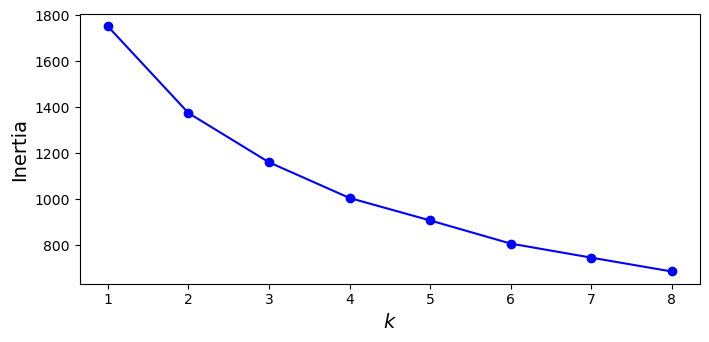

In [86]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 9), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show();
# En las Inertias si queremos el elbow que disminuye primero, parece que k=2


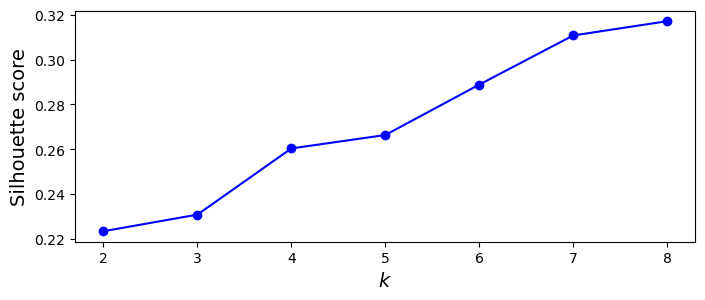

In [87]:
#from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 9), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show();

#En silhouette score queremos que el codo sea máximo, nos fijamos en eso. Por eso -> k=8 parece la mejor opoción

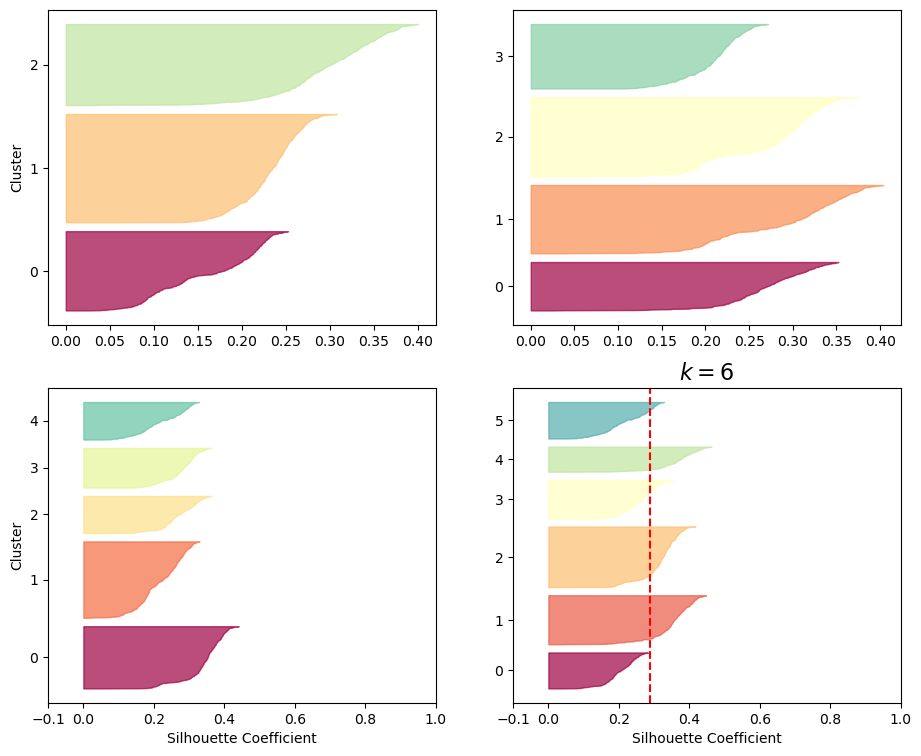

In [96]:
# Miramos diagramas de silueta, a ver qué dice
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=True)

plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
plt.title("$k={}$".format(k), fontsize=16)
plt.show();

Por lo poco que veo aquí, parece que k=3, k=4 o k=6 serían los que mejor funncionan.

In [98]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_6 = KMeans(n_clusters=6, random_state=42)

y_pred3 = kmeans_3.fit_predict(X)
y_pred4 = kmeans_4.fit_predict(X)
y_pred6 = kmeans_6.fit_predict(X)

**PRIMERA PRUEBA**  
kmeans=3

In [99]:
df_escalado.columns

Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'time_signature', 'mode',
       'al_type_single', 'al_type_compilation', 'exp_False',
       'track_duration_sc', 'popularity_sc', 'artis_followers_sc', 'tempo_sc',
       'loudness_sc', 'key_sc'],
      dtype='object')

In [107]:
df_km3= df_escalado.copy()
df_km3["target"] = y_pred3

X = df_km3.drop(columns=("target"),axis=1)
y = df_km3["target"]

In [108]:
df_km3

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,mode,al_type_single,al_type_compilation,exp_False,track_duration_sc,popularity_sc,artis_followers_sc,tempo_sc,loudness_sc,key_sc,target
0,0.714,0.472,0.0864,0.01300,0.000005,0.2660,0.238,4,1,1,0,1,0.145891,1.000000,0.199310,0.467157,0.737932,0.181818,1
1,0.637,0.643,0.0519,0.13000,0.000002,0.1420,0.533,4,1,0,0,1,0.225191,0.967391,0.624873,0.242684,0.765999,0.363636,1
2,0.561,0.520,0.2440,0.05030,0.000002,0.3550,0.424,4,0,0,0,0,0.295287,0.945652,0.657869,0.658366,0.661742,0.363636,0
3,0.835,0.679,0.0364,0.58300,0.000002,0.2180,0.850,4,0,1,0,1,0.156213,0.967391,0.105281,0.427505,0.815982,0.636364,2
4,0.561,0.965,0.0343,0.00383,0.000007,0.3710,0.304,4,0,1,0,0,0.179055,0.967391,0.232521,0.447637,0.878879,0.636364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0.660,0.578,0.0306,0.45000,0.000089,0.1030,0.190,4,1,1,0,1,0.349055,0.554348,0.007626,0.441400,0.692089,0.818182,1
1463,0.742,0.662,0.0647,0.57800,0.000000,0.1260,0.486,4,1,1,0,1,0.223941,0.554348,0.027368,0.157932,0.841733,0.454545,1
1464,0.599,0.727,0.0783,0.66800,0.000026,0.1020,0.697,4,1,1,0,1,0.249850,0.554348,0.000444,0.710400,0.832504,0.363636,1
1465,0.534,0.752,0.1000,0.60800,0.000006,0.0842,0.304,4,1,1,0,1,0.256078,0.521739,0.002485,0.725045,0.786965,0.363636,1


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape

((1173, 18), (294, 18))

**PRIMER MODELO**  
Pruebo con random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rnd_clf1 = RandomForestClassifier(n_estimators=100,max_features=3,random_state=42)

rnd_clf1.fit(X_train, y_train)

y_pred_rf1 = rnd_clf1.predict(X_test)
accuracy_score(y_test, y_pred_rf1)
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        89

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



**SEGUNDO MODELO**  
Pruebo con XGBoost

In [111]:
import xgboost
from xgboost import XGBClassifier

xgb_clas1 = xgboost.XGBClassifier(n_estimators=100, eta=0.05, max_depth=2, min_child_weight=5,random_state=42)
xgb_clas1.fit(X_train, y_train)

y_pred_xgb1 = xgb_clas1.predict(X_test)
accuracy_score(y_test, y_pred_xgb1)
print(classification_report(y_test, y_pred_xgb1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       1.00      1.00      1.00       118
           2       1.00      1.00      1.00        89

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



**TERCER MODELO**  
Pruebo CatBoost

In [115]:
df_km3_cat = df_km3.copy()
df_km3_cat["track_name"]=df_songs_new["track_name"]

Xc = df_km3_cat.drop(columns=("target"),axis=1)
yc = df_km3_cat["target"]

In [114]:
df_km3_cat

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,mode,al_type_single,al_type_compilation,exp_False,track_duration_sc,popularity_sc,artis_followers_sc,tempo_sc,loudness_sc,key_sc,target,track_name
0,0.714,0.472,0.0864,0.01300,0.000005,0.2660,0.238,4,1,1,0,1,0.145891,1.000000,0.199310,0.467157,0.737932,0.181818,1,Unholy (feat. Kim Petras)
1,0.637,0.643,0.0519,0.13000,0.000002,0.1420,0.533,4,1,0,0,1,0.225191,0.967391,0.624873,0.242684,0.765999,0.363636,1,Anti-Hero
2,0.561,0.520,0.2440,0.05030,0.000002,0.3550,0.424,4,0,0,0,0,0.295287,0.945652,0.657869,0.658366,0.661742,0.363636,0,Rich Flex
3,0.835,0.679,0.0364,0.58300,0.000002,0.2180,0.850,4,0,1,0,1,0.156213,0.967391,0.105281,0.427505,0.815982,0.636364,2,La Bachata
4,0.561,0.965,0.0343,0.00383,0.000007,0.3710,0.304,4,0,1,0,0,0.179055,0.967391,0.232521,0.447637,0.878879,0.636364,0,I'm Good (Blue)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1462,0.660,0.578,0.0306,0.45000,0.000089,0.1030,0.190,4,1,1,0,1,0.349055,0.554348,0.007626,0.441400,0.692089,0.818182,1,Thức Giấc
1463,0.742,0.662,0.0647,0.57800,0.000000,0.1260,0.486,4,1,1,0,1,0.223941,0.554348,0.027368,0.157932,0.841733,0.454545,1,Đi Về Nhà
1464,0.599,0.727,0.0783,0.66800,0.000026,0.1020,0.697,4,1,1,0,1,0.249850,0.554348,0.000444,0.710400,0.832504,0.363636,1,Mặt Mộc
1465,0.534,0.752,0.1000,0.60800,0.000006,0.0842,0.304,4,1,1,0,1,0.256078,0.521739,0.002485,0.725045,0.786965,0.363636,1,Anh Đánh Rơi Người Yêu Này


In [116]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc,test_size=0.2,random_state=42,stratify=y)
Xc_train.shape, Xc_test.shape

((1173, 19), (294, 19))

In [121]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import mean_squared_error

cb = CatBoostClassifier(n_estimators=200, loss_function='accuracy', learning_rate=0.4, random_state=1)

pool_train = Pool(Xc_train, yc_train, text_features=["track_name"]) #objeto para variables categóricas

pool_test = Pool(Xc_test, text_features=["track_name"])

cb.fit(pool_train)

CatBoostError: catboost/private/libs/options/loss_description.cpp:18: accuracy loss is not supported

**SEGUNDA PRUEBA**  
kmeans=4

In [ ]:
df_km3= df_escalado.copy()
df_km3["target"] = y_pred3

X = df_km3.drop(columns=("target"),axis=1)
y = df_km3["target"]

### DIVIDIR

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape, X_test.shape

((1173, 19), (294, 19))

Terminar de tratar features que para este modelo (el de clasificación)[RandomForest, CatBoost o XGBoost] sí que pueden aportar.  
- 'artist'  
- 'country'
- 'artist_genres'  
- 'artist_followers' 